<a href="https://colab.research.google.com/github/shu7620/IDRID/blob/main/eye_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Access Files Stored in Google Drive**

In [ ]:
# prompt: how to access files stored in my google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import the necessary Libraries**

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [ ]:
image_size = (224, 224)
batch_size = 32
num_classes = 5

In [ ]:
#Applies MobileNetV2-specific preprocessing (like normalization of pixels).
#Creates separate generators for training and testing.
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# **Loading the Training and Testing data**

In [ ]:
train_dir = '/content/drive/MyDrive/Train'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 412 images belonging to 5 classes.


In [ ]:
test_dir = '/content/drive/MyDrive/Test'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False #shuffle=False ensures evaluation matches label order consistently.
)

Found 103 images belonging to 5 classes.


# **Import the pretrained mobilenetV2**

In [ ]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# **Builds Custom Classification layers**

In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

# **Train the Model**

In [ ]:
history=model.fit(train_generator,validation_data=test_generator,epochs=12)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 341s 26s/step - accuracy: 0.1914 - loss: 2.2160 - val_accuracy: 0.2816 - val_loss: 1.5219
Epoch 2/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - accuracy: 0.2909 - loss: 1.6713 - val_accuracy: 0.3398 - val_loss: 1.4838
Epoch 3/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.3838 - loss: 1.5329 - val_accuracy: 0.3689 - val_loss: 1.4227
Epoch 4/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.4169 - loss: 1.3830 - val_accuracy: 0.4175 - val_loss: 1.3970
Epoch 5/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 0.4756 - loss: 1.4256 - val_accuracy: 0.4175 - val_loss: 1.3655
Epoch 6/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - accuracy: 0.4928 - loss: 1.2732 - val_accuracy: 0.4078 - val_loss: 1.3389
Epoch 7/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.5022 - loss: 1.2793 - val_accuracy: 0.4466 - val_loss: 1.3231
Epoch 8/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.5018 - loss: 1.2178 - val_accuracy: 0.4175 - val_los

# **Training Vs Validation accuracy**

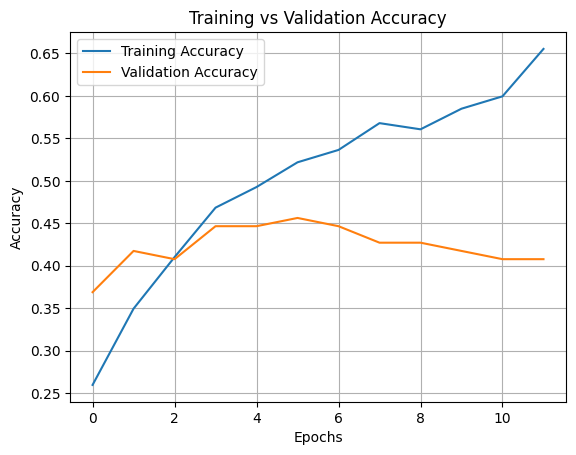

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Training Vs Validation Loss**

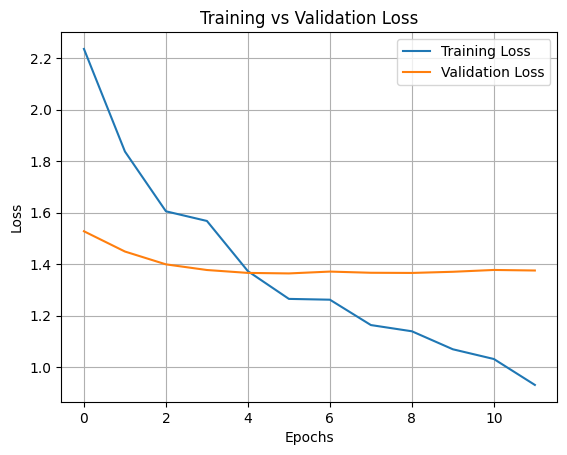

In [ ]:
# Loss Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# **Accuracy Analysis**

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy:", accuracy) #Test Accuracy: 0.5048543810844421

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5354 - loss: 1.1391
Test Accuracy: 0.4660194218158722


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels
true_labels = test_generator.classes

# Get predicted probabilities
pred_probs = model.predict(test_generator)

# Get predicted class indices
pred_labels = np.argmax(pred_probs, axis=1)

# Get label names
class_names = list(test_generator.class_indices.keys())

5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step


# **Confusion Matrix**

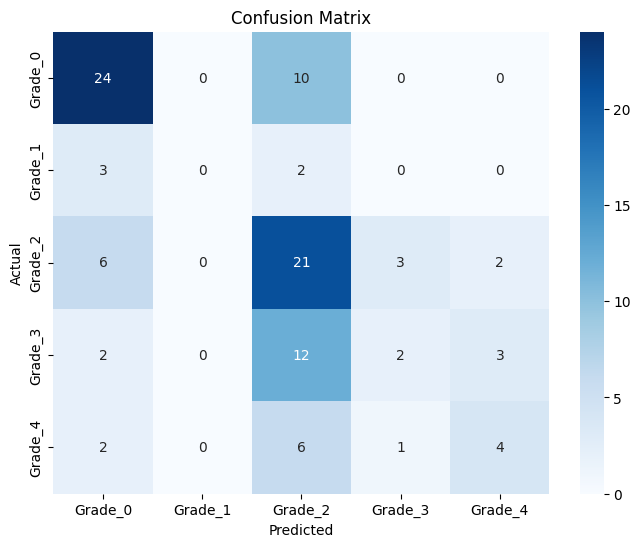

In [ ]:
# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Metrics(Precision, recall, f1-score, support)**

In [ ]:
report = classification_report(true_labels, pred_labels, target_names=class_names)
print(report)

              precision    recall  f1-score   support

     Grade_0       0.65      0.71      0.68        34
     Grade_1       0.00      0.00      0.00         5
     Grade_2       0.41      0.66      0.51        32
     Grade_3       0.33      0.11      0.16        19
     Grade_4       0.44      0.31      0.36        13

    accuracy                           0.50       103
   macro avg       0.37      0.36      0.34       103
weighted avg       0.46      0.50      0.46       103



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Sample Predictions**

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step


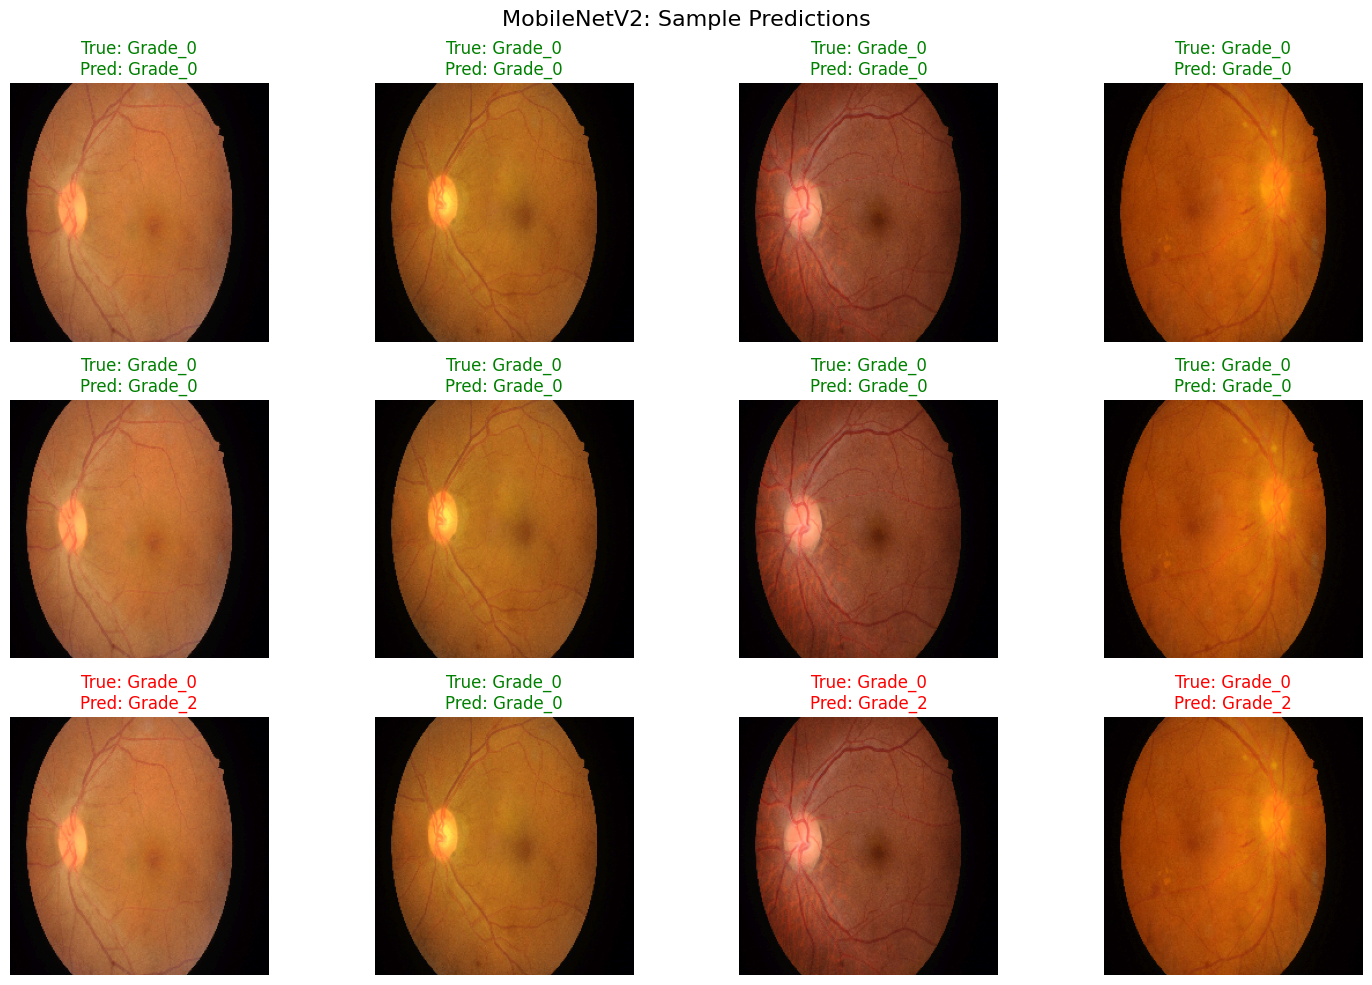

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get class names
class_names = list(test_generator.class_indices.keys())

# Reset test generator so predictions match order
test_generator.reset()

# Make predictions on the test set
pred_probs = model.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = test_generator.classes

# Number of samples to show
num_samples = 12

plt.figure(figsize=(15, 10))
# Iterate through the test generator to get images and labels
for i, (img_batch, _) in enumerate(test_generator):
    if i >= num_samples:
        break

    img = img_batch[0]

    # Unprocess image (MobileNetV2 preprocesses it)
    img_disp = img.astype("float32")
    img_disp = img_disp / 2.0 + 0.5  # approximate reverse preprocessing

    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(img_disp)
    true = class_names[true_labels[i]]
    pred = class_names[pred_labels[i]]
    color = "green" if pred == true else "red"
    plt.title(f"True: {true}\nPred: {pred}", color=color)
    plt.axis("off")

plt.suptitle("MobileNetV2: Sample Predictions", fontsize=16)
plt.tight_layout()
plt.show()

# **Save the Model**

In [ ]:
# prompt: I want to design an interfac with html css that will accept images and will predict the class of the image according to the prediction of my model...can you help me to create the interface and integrate my trained model into it

# Save the model
model.save('/content/drive/MyDrive/image_classification_model.h5')
print("Model saved successfully.")


Model saved successfully.


# **Integrate the model into the interface**

In [ ]:
# prompt: integrate my model into the interface such that when we click the predict button  my model will predict the image give the result as output

from PIL import Image
import io
import base64
from tensorflow.keras.preprocessing import image as keras_image

def predict_uploaded_image(image_data):
    try:
        # Decode base64 image data
        img_bytes = base64.b64decode(image_data.split(',')[1])
        img = Image.open(io.BytesIO(img_bytes))

        # Preprocess the image for the model
        img = img.resize(image_size)  # Resize to the model's input size
        img_array = keras_image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array) # Apply the same preprocessing as training

        # Make prediction
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        predicted_class_name = class_names[predicted_class_index]
        confidence = np.max(predictions) * 100

        return f"Prediction: {predicted_class_name} (Confidence: {confidence:.2f}%)"

    except Exception as e:
        return f"Error during prediction: {e}"

# Create a button that will trigger the prediction function
from google.colab.output import eval_js
from IPython.display import Javascript

def register_predict_button():
    # Use Javascript to listen for the button click and pass the image data
    js = Javascript('''
        google.colab.kernel.bindButton('predict_button', (image_data) => {
            google.colab.kernel.invokeFunction('notebook.predict_uploaded_image_colab', [image_data,"cat"], {});
        });
    ''')
    display(js)



# Register the button
register_predict_button()

from google.colab.output import register_callback
from google.colab import output

def predict_uploaded_image_colab(image_data):
  # This function acts as a bridge between the Javascript and the Python prediction function
  result = predict_uploaded_image(image_data)
  # Send the result back to the HTML interface
  output.eval_js(f'document.getElementById("prediction").innerText = "{result}";')

register_callback('notebook.predict_uploaded_image_colab', predict_uploaded_image_colab)




<IPython.core.display.Javascript object>

# **HTML code for the interface**

In [ ]:
from IPython.core.display import HTML

html_interface = """
<!DOCTYPE html>
<html>
<head>
<title>Image Classification</title>
<style>
  body { font-family: Arial, sans-serif; background-color: #f9f9f9; }
  .container {
    width: 400px;
    margin: 50px auto;
    text-align: center;
    border: 1px solid #ccc;
    padding: 20px;
    border-radius: 8px;
    background-color: #fff;
    box-shadow: 0 0 10px rgba(0,0,0,0.1);
  }
  input[type="file"] { margin-bottom: 20px; }
  #preview {
    margin-top: 20px;
    max-width: 100%;
    border: 1px solid #ddd;
    border-radius: 4px;
    display: none;
  }
  #predict_button {
    margin-top: 20px;
    padding: 10px 20px;
    font-size: 1em;
    background-color: #4CAF50;
    color: white;
    border: none;
    border-radius: 4px;
    cursor: pointer;
  }
  #predict_button:hover {
    background-color: #45a049;
  }
  #prediction {
    margin-top: 20px;
    font-size: 1.2em;
    color: #333;
  }
</style>
</head>
<body>
  <div class="container">
    <h2>Upload an Image for Classification</h2>
    <input type="file" id="imageUpload" accept="image/*">
    <img id="preview" src="" alt="Image Preview">
    <button id="predict_button">Predict</button>
    <div id="prediction"></div>
  </div>

  <script>
    let imageData = "";

    const imageUpload = document.getElementById('imageUpload');
    const previewImage = document.getElementById('preview');
    const predictionDiv = document.getElementById('prediction');
    const predictButton = document.getElementById('predict_button');

    imageUpload.addEventListener('change', function(event) {
      const file = event.target.files[0];
      if (!file) return;

      const reader = new FileReader();
      reader.onload = function(e) {
        imageData = e.target.result;
        previewImage.src = imageData;
        previewImage.style.display = 'block';
      };
      reader.readAsDataURL(file);
    });

    predictButton.addEventListener('click', function() {
      if (!imageData) {
        predictionDiv.innerText = 'Please upload an image first.';
        return;
      }
      predictionDiv.innerText = 'Predicting...';
      google.colab.kernel.invokeFunction('notebook.predict_uploaded_image_colab', [imageData], {});
    });
  </script>
</body>
</html>
"""

display(HTML(html_interface))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
